# Домашнее задание 2.
Dynamical Forecasting Methods

In [ ]:
!pip iinstallnstall scaleogram

In [ ]:
import os
import math as m
import numpy as np
import pandas as pd
from scipy import *
import scipy.linalg
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scaleogram as scg
from scipy.fftpack import fft
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
warnings.simplefilter('ignore')

plt.rcParams['figure.figsize'] = 16, 8
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 8

In [ ]:
def HankelMatrix(X, L):
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

# Пример

Показания акселерометра мобильного устройства с частотой записи 500Гц

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/intsystems/MathematicalForecastingMethods/main/data/walk_example.csv"
data = pd.read_csv(DATA_PATH, delimiter =',')

<Axes: >

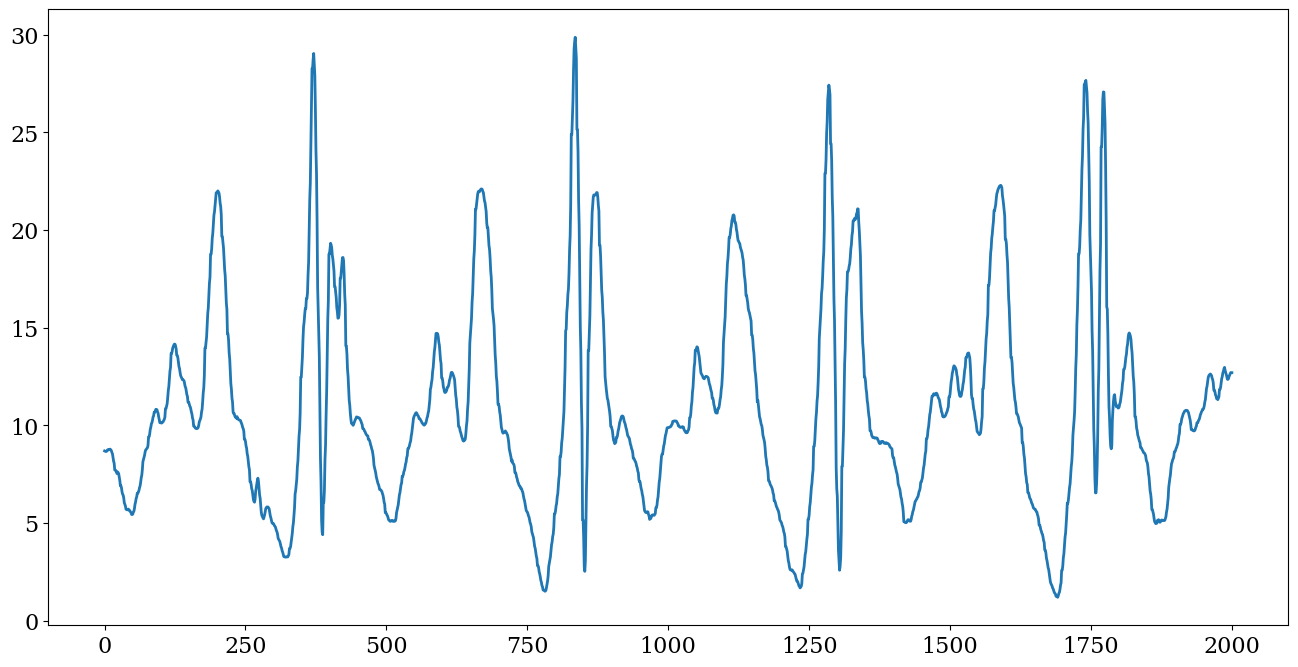

In [ ]:
# исследуемый временной ряд - корень из суммы квадратов показаний акселерометра по осям
data['ts'] = data[['X_value', 'Y_value', 'Z_value']].pow(2).sum(axis = 1).pow(0.5)
data.loc[:2000,'ts'].plot()

In [ ]:
X = HankelMatrix(data['ts'] , 500)
X.shape

(39502, 500)

In [ ]:
from sklearn.decomposition import KernelPCA, PCA

Пример восстановленной фазовой траектории в пространстве размерности 3

временной ряд -> метод задержек -> PCA -> 3 главные компоненты, как оценка координат изначальной системы

In [ ]:
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)

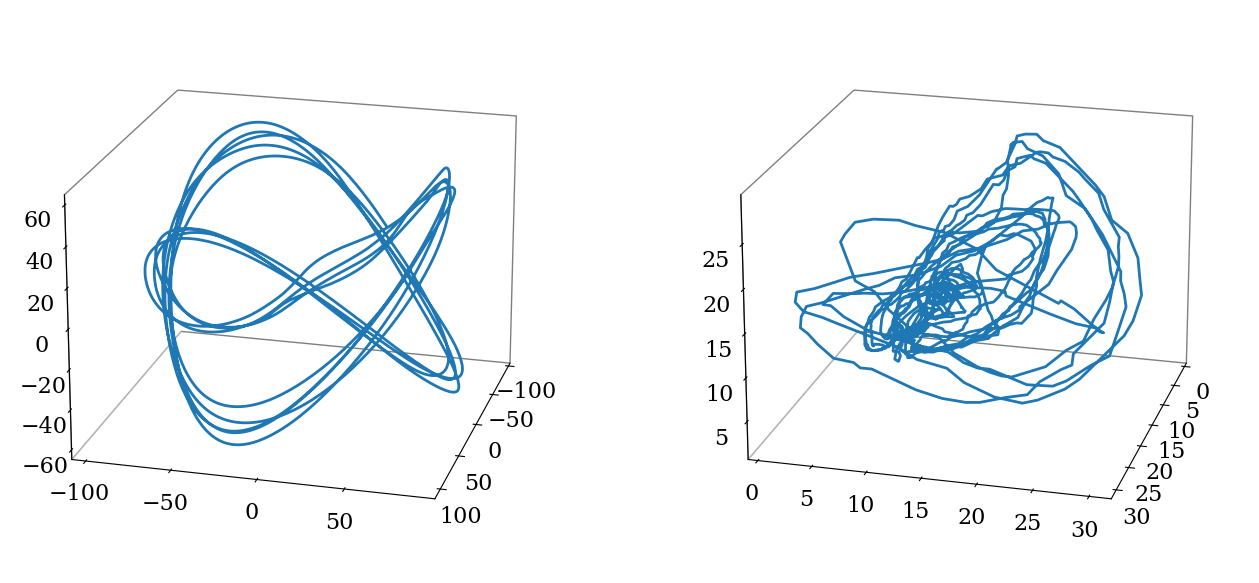

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,2,1, projection='3d')
# метод  PCA
ax.plot(
    X_PCA[:2000,0],
    X_PCA[:2000,1],
    X_PCA[:2000,2]
)

ax.view_init(elev=20, azim=15)

ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax2 = fig.add_subplot(1,2,2, projection='3d')
# 3 случайные точки из предыстории
ax2.plot(
    X[:2000,0],
    X[:2000,20],
    X[:2000,30]
)

ax2.view_init(elev=20, azim=15)

ax2.grid(False)
ax2.xaxis.pane.set_edgecolor('black')
ax2.yaxis.pane.set_edgecolor('black')
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False


plt.show()

# Задание

Набор данных включает в себя данные временных рядов, генерируемые датчиками акселерометра и гироскопа.
https://github.com/mmalekzadeh/motion-sense/tree/master

1. Выбрать один из датасетов ходьбы ```wlk_*``` или бега ```jog_*``` для одного человека ```sub_*```
2. Проанализировать связь между показателями акселерометра и гироскопа
    - Графики автокорреляций
    - Тест Грэнджера на причинность ([пример](https://phdinds-aim.github.io/time_series_handbook/04_GrangerCausality/04_GrangerCausality.html))
    - CCM ([пример](https://phdinds-aim.github.io/time_series_handbook/06_ConvergentCrossMappingandSugiharaCausality/ccm_sugihara.html))
3. Посторить фазовую траекторию (пример выше), проанализировать формы полученных множеств (Если по CCM делается вывод о связи временных рядов, то их фазовые траектории будут похожи)    
    - По 3 случайным точкам из предыстории
    - Методом PCA
    - Другим методом снижения размерности (например, t-sne, kernel PCA, UMAP и тд)
4. Разложить временной ряд на компоненты
    - Методом ```from statsmodels.tsa.seasonal import seasonal_decompose```
    - Методом ```from scipy.fftpack import fft``` (как в семинаре)
    - Методом SSA ([пример](https://www.kaggle.com/code/jdarcy/introducing-ssa-for-time-series-decomposition/notebook)) (как в семинаре)
    - Обучить и проанализировать результаты двух ARIMA моделей на начальном и обработанном с помощью SSA (только для акселерометра)

In [ ]:
import requests
from zipfile import ZipFile
from io import BytesIO

url = "https://github.com/mmalekzadeh/motion-sense/raw/master/data/A_DeviceMotion_data.zip"
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))
extract_folder = "A_DeviceMotion_data"
import os
os.makedirs(extract_folder, exist_ok=True)
zip_file.extractall(extract_folder)


In [ ]:
ls A_DeviceMotion_data/A_DeviceMotion_data/

dws_1/   dws_2/   jog_9/   sit_5/   std_6/   ups_3/  wlk_15/  wlk_8/
dws_11/  jog_16/  sit_13/  std_14/  ups_12/  ups_4/  wlk_7/


In [ ]:
# url_c_gyroscope = "https://github.com/mmalekzadeh/motion-sense/raw/master/data/C_Gyroscope_data.zip"
# response_c_gyroscope = requests.get(url_c_gyroscope)
# zip_file_c_gyroscope = ZipFile(BytesIO(response_c_gyroscope.content))
# extract_folder_c_gyroscope = "C_Gyroscope_data"
# os.makedirs(extract_folder_c_gyroscope, exist_ok=True)
# zip_file_c_gyroscope.extractall(extract_folder_c_gyroscope)

In [ ]:
# url_b_accelerometer = "https://github.com/mmalekzadeh/motion-sense/raw/master/data/B_Accelerometer_data.zip"
# response_b_accelerometer = requests.get(url_b_accelerometer)
# zip_file_b_accelerometer = ZipFile(BytesIO(response_b_accelerometer.content))
# extract_folder_b_accelerometer = "B_Accelerometer_data"
# os.makedirs(extract_folder_b_accelerometer, exist_ok=True)
# zip_file_b_accelerometer.extractall(extract_folder_b_accelerometer)

In [ ]:
# предварительно загруженный датасет
print(os.listdir('./A_DeviceMotion_data/A_DeviceMotion_data'))
# print(os.listdir('./B_Accelerometer_data/B_Accelerometer_data'))
# print(os.listdir('./C_Gyroscope_data/C_Gyroscope_data'))

['sit_5', 'dws_2', 'ups_4', 'wlk_8', 'std_6', 'wlk_15', 'jog_9', 'wlk_7', 'dws_11', 'std_14', 'ups_12', 'sit_13', 'jog_16', 'dws_1', 'ups_3']


In [ ]:
motion = pd.read_csv('./A_DeviceMotion_data/A_DeviceMotion_data/wlk_7/sub_1.csv')
motion = motion[[
    'rotationRate.x',
    'rotationRate.y',
    'rotationRate.z',
    'userAcceleration.x',
    'userAcceleration.y',
    'userAcceleration.z'
]]
rot = pd.DataFrame()
rot['x'] = motion['rotationRate.x']
rot['y'] =  motion['rotationRate.y']
rot['z'] = motion['rotationRate.z']
acc = pd.DataFrame()

acc['x'] = motion['userAcceleration.x']
acc['y'] =  motion['userAcceleration.y']
acc['z'] = motion['userAcceleration.z']


In [ ]:
# подготовка временных рядов
motion['rot'] = motion[['rotationRate.x', 'rotationRate.y', 'rotationRate.z']].pow(2).sum(axis = 1).pow(0.5)
rot_norm = motion['rot']
motion['acc'] = motion[['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']].pow(2).sum(axis = 1).pow(0.5)
acc_norm = motion['acc']

<Axes: >

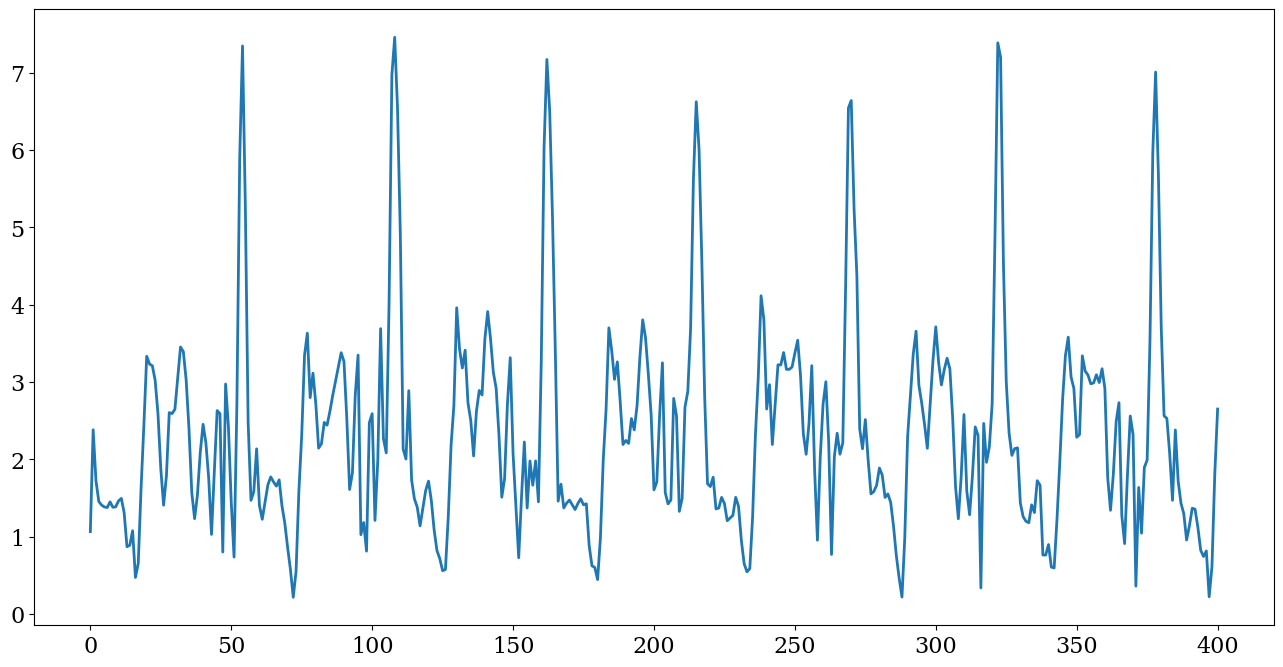

In [ ]:
motion.loc[:400,'rot'].plot()

<Axes: >

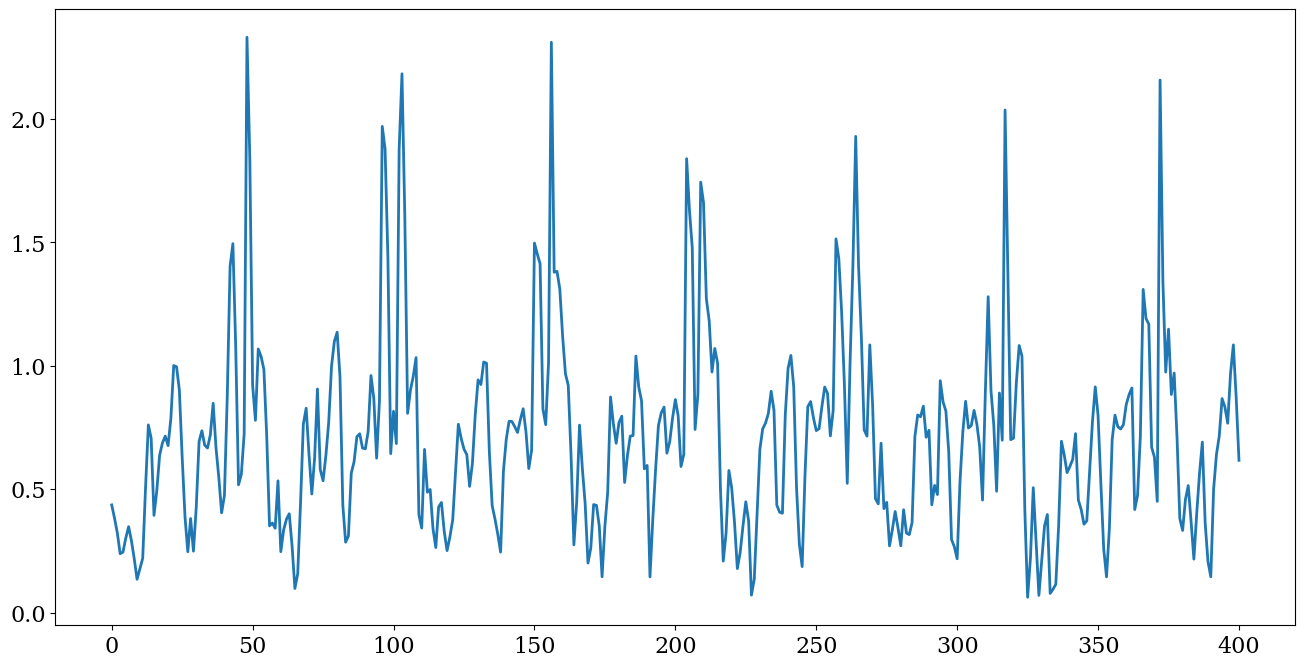

In [ ]:
motion.loc[:400,'acc'].plot()

## Автокорелляция между двумя рядами

In [ ]:
acf_rot = acf(rot_norm - np.mean(rot_norm), nlags = len(rot_norm),alpha=0.5)

fig = go.Figure()
fig.add_scatter(x = np.arange(len(acf_rot[0])), y = acf_rot[0], mode='lines', name='ACF')
fig.show()

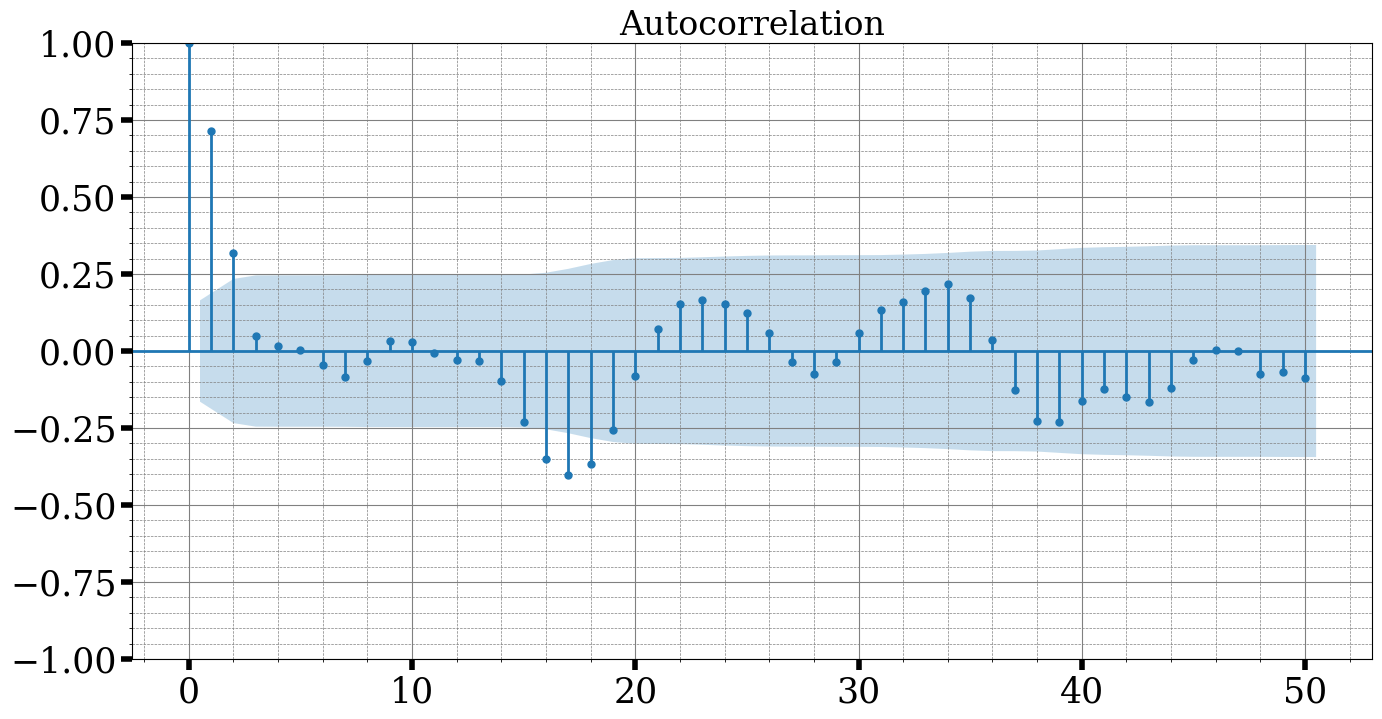

In [ ]:
ax = plot_acf(
    rot_norm[:100],
    lags=50,
    use_vlines = True,
    alpha=0.1
)
plt.tick_params(
    axis='both',
    which='major',
    labelsize=25,
    length=8,
    width=4
)
plt.grid(
    which='major',
    color = 'gray',
    linewidth = 0.8
)
plt.minorticks_on()
plt.grid(
    which='minor',
    color = 'gray',
    linestyle = '--',
    linewidth = 0.5
)
plt.show()

In [ ]:
acf_acc = acf(acc_norm - np.mean(acc_norm), nlags = len(acc_norm),alpha=0.5)

fig = go.Figure()
fig.add_scatter(x = np.arange(len(acf_acc[0])), y = acf_acc[0], mode='lines', name='ACF')
fig.show()

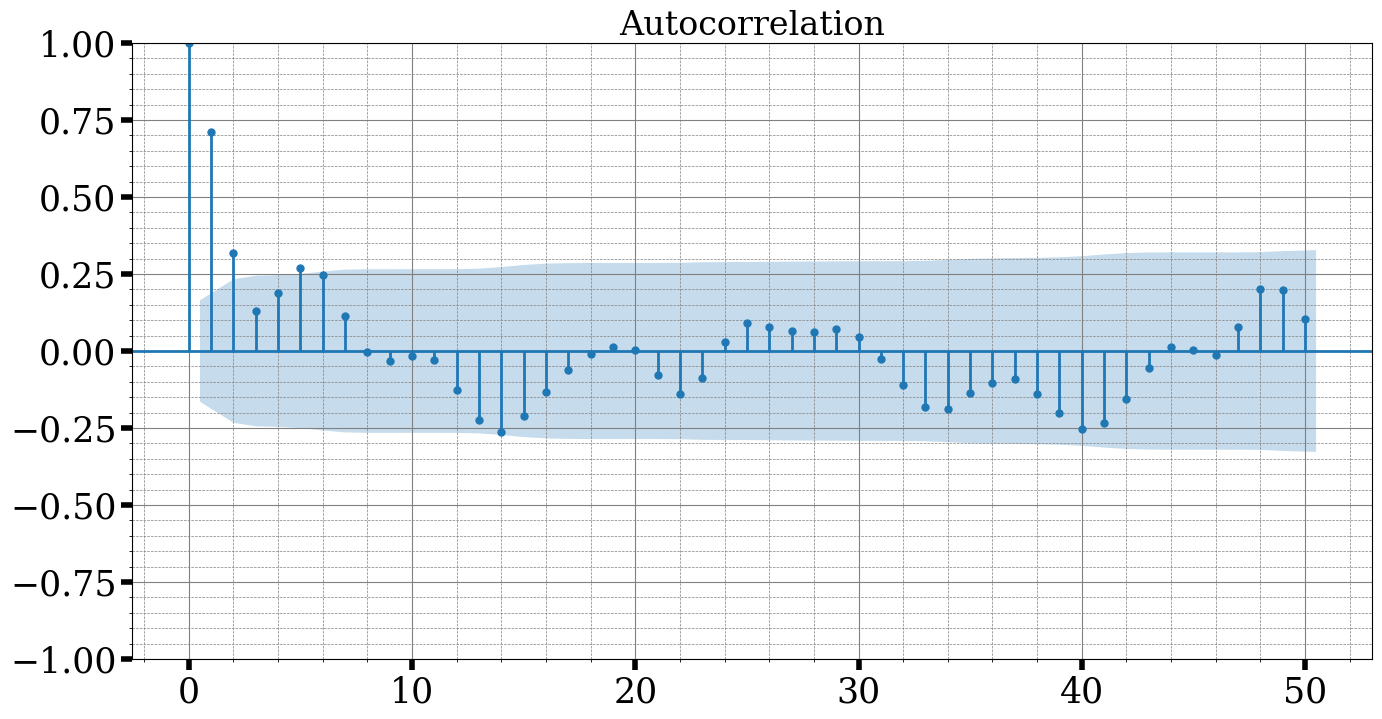

In [ ]:
ax = plot_acf(
    acc_norm[:100],
    lags=50,
    use_vlines = True,
    alpha=0.1
)
plt.tick_params(
    axis='both',
    which='major',
    labelsize=25,
    length=8,
    width=4
)
plt.grid(
    which='major',
    color = 'gray',
    linewidth = 0.8
)
plt.minorticks_on()
plt.grid(
    which='minor',
    color = 'gray',
    linestyle = '--',
    linewidth = 0.5
)
plt.show()

## Тест Гренджера

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 5
test_result = grangercausalitytests(np.column_stack((rot_norm - rot_norm.mean(), acc_norm - acc_norm.mean())), max_lag, verbose=True)

for lag in range(1, max_lag + 1):
    p_value = test_result[lag][0]['ssr_ftest'][1]
    print(f'Granger causality test (lag={lag}): p-value = {p_value}')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.9633 , p=0.0000  , df_denom=5435, df_num=1
ssr based chi2 test:   chi2=19.9743 , p=0.0000  , df=1
likelihood ratio test: chi2=19.9377 , p=0.0000  , df=1
parameter F test:         F=19.9633 , p=0.0000  , df_denom=5435, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=94.3566 , p=0.0000  , df_denom=5432, df_num=2
ssr based chi2 test:   chi2=188.8870, p=0.0000  , df=2
likelihood ratio test: chi2=185.6800, p=0.0000  , df=2
parameter F test:         F=94.3566 , p=0.0000  , df_denom=5432, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=82.5039 , p=0.0000  , df_denom=5429, df_num=3
ssr based chi2 test:   chi2=247.8307, p=0.0000  , df=3
likelihood ratio test: chi2=242.3474, p=0.0000  , df=3
parameter F test:         F=82.5039 , p=0.0000  , df_denom=5429, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=154.5618, p=0.

Тест показывает , что данные ряды имеют причинность

## Convergent Cross Mapping

In [ ]:
pip install skccm

  Preparing metadata (setup.py) ... done
  Created wheel for skccm: filename=skccm-0.2.dev0-py3-none-any.whl size=12589 sha256=1e3b49c5e40262a44bae9834cc7acf62fe6de45d25064d4060e4e021bbddae16
  Stored in directory: /root/.cache/pip/wheels/e7/d5/75/bc40ea6d0bc02c008d45801f0834793f7d1179333ef595f434
Successfully built skccm


In [ ]:
import skccm as ccm
from sklearn.neighbors import NearestNeighbors

In [ ]:
e1 = ccm.Embed(rot_norm)
e2 = ccm.Embed(acc_norm)
X1 = e1.embed_vectors_1d(1,50)
X2 = e2.embed_vectors_1d(1,50)


In [ ]:
def mapping_and_check_dists(X1,X2 , m=100) :
  dists_x = []
  dists_y = []
  for j in range(m) :
      random_index = np.random.randint(1, X1.shape[0])
      nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X1)
      distances, indices = nbrs.kneighbors([X1[random_index]])
      # Образ выбранных соседей х : phi(x) = y in X2
      phi_x = X2[indices]
      dists_phi_x = np.linalg.norm( phi_x - X2[random_index], axis=1)
      dists_x.append(distances.mean())
      dists_y.append(dists_phi_x.mean())
  return dists_x , dists_y

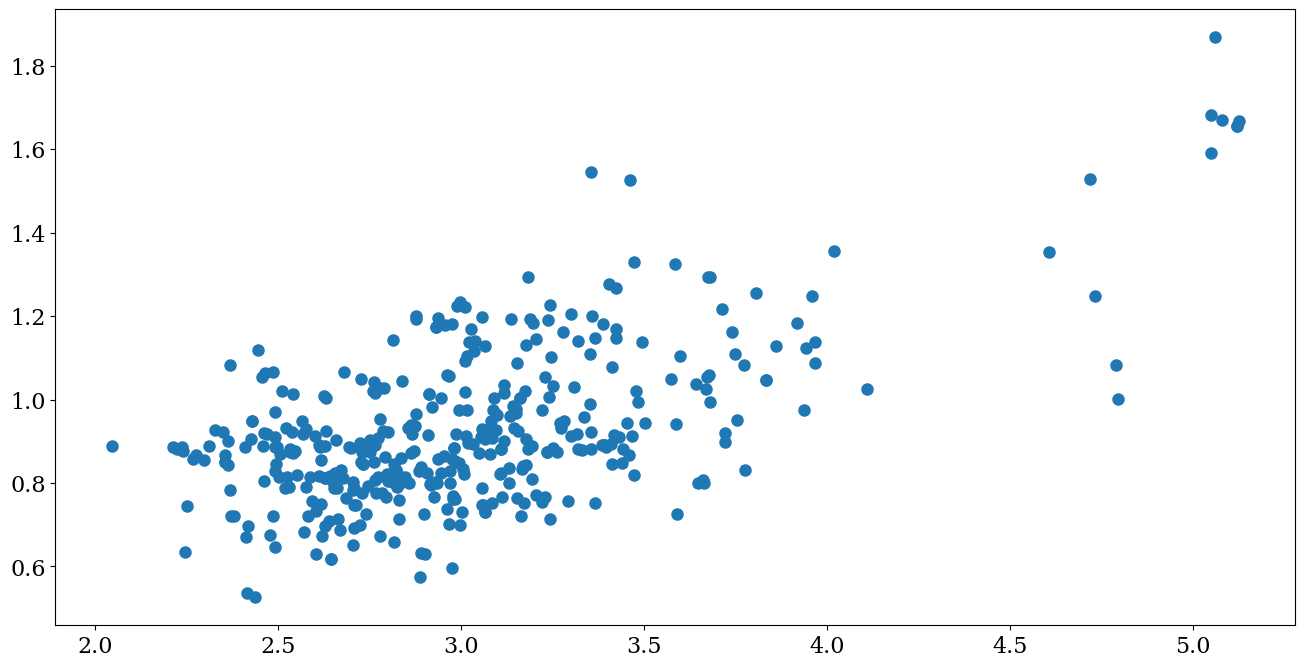

In [ ]:
x , y = mapping_and_check_dists(X1,X2, m = 400)
plt.scatter(x,y)

In [ ]:
print(np.max(np.array(y)/np.array(x)))

0.460751183508162


Как видим расстояния между ближайшими точками в X1 и расстояния между отображенными точками в X2 соотносятся между с собой с некоторой константой липшица меньшей 1, что говорит о зависимости рядов

Анализ через PCA


In [ ]:
pca1 = PCA(n_components=3)
X1_pca = pca.fit_transform(X1)
pca2 = PCA(n_components=3)
X2_pca = pca.fit_transform(X2)

In [ ]:
def plot_trajectory(X1,X2, n):
  fig = plt.figure(figsize=plt.figaspect(0.5))
  ax = fig.add_subplot(1,2,1, projection='3d')
  ax.plot(
      X1[:,0][:n] ,
      X1[:,1][:n] ,
      X1[:,2][:n]
  )

  ax.view_init(elev=20, azim=15)

  ax.grid(False)
  ax.xaxis.pane.set_edgecolor('black')
  ax.yaxis.pane.set_edgecolor('black')
  ax.xaxis.pane.fill = False
  ax.yaxis.pane.fill = False
  ax.zaxis.pane.fill = False

  ax2 = fig.add_subplot(1,2,2, projection='3d')
  # 3 случайные точки из предыстории
  ax2.plot(
      X2[:,0][:n] ,
      X2[:,1][:n] ,
      X2[:,2][:n]
  )

  ax2.view_init(elev=20, azim=15)

  ax2.grid(False)
  ax2.xaxis.pane.set_edgecolor('black')
  ax2.yaxis.pane.set_edgecolor('black')
  ax2.xaxis.pane.fill = False
  ax2.yaxis.pane.fill = False
  ax2.zaxis.pane.fill = False


  plt.show()

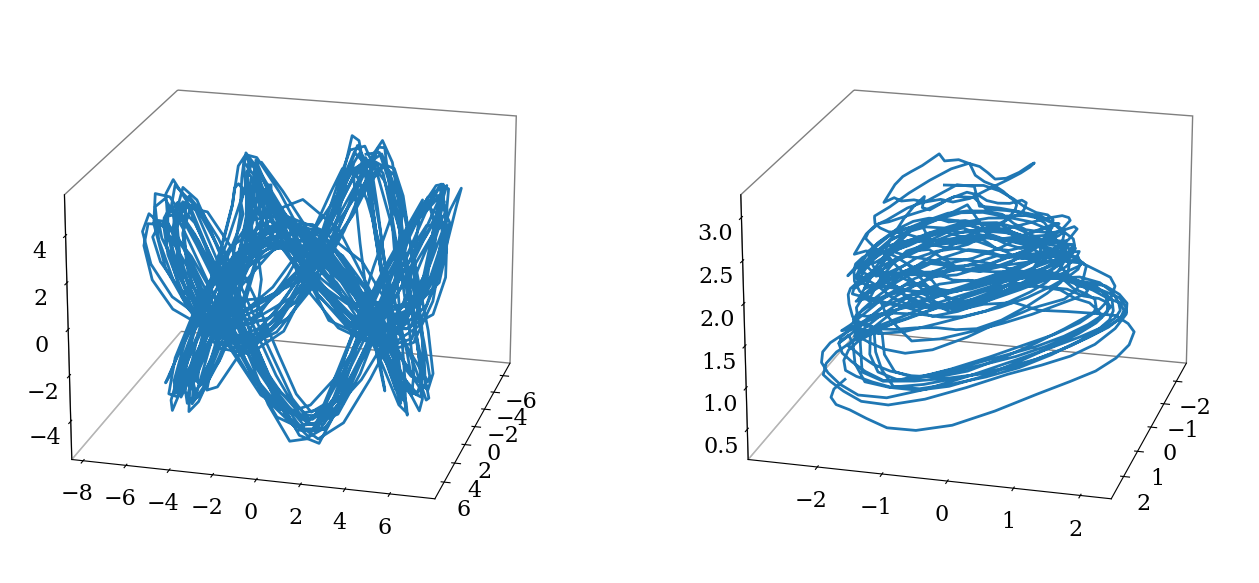

In [ ]:
plot_trajectory(X1_pca ,X2_pca , 1000)

По последним 3 точкам предыстории

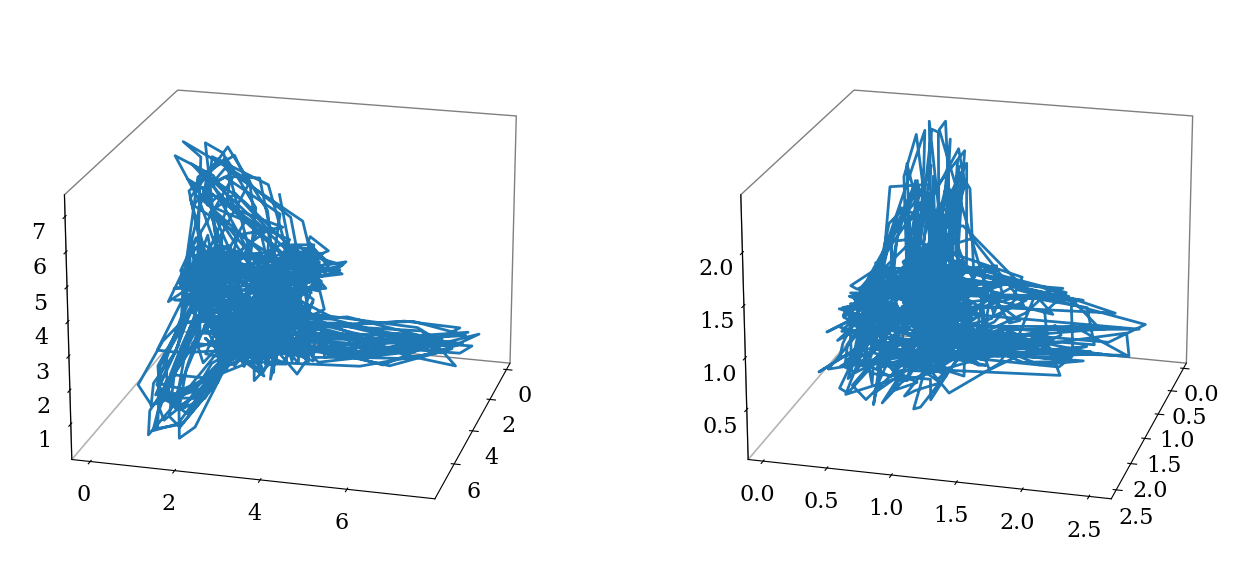

In [ ]:
plot_trajectory(X1[:,[10,20,30]] ,X2[:,[10,20,30]] , 1000)

## Kernel PCA

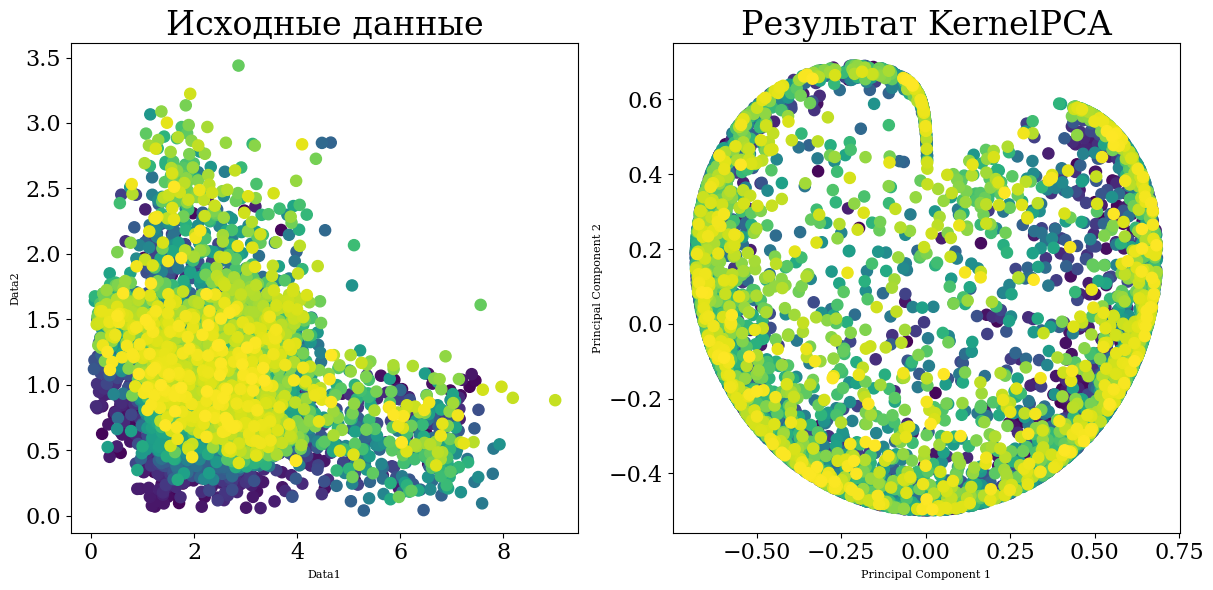

In [ ]:
X = np.column_stack((rot_norm, acc_norm))

kpca = KernelPCA(kernel='rbf', n_components=2)

X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=np.arange(0,len(rot_norm),1), cmap='viridis')
plt.title('Исходные данные')
plt.xlabel('Data1')
plt.ylabel('Data2')

plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=np.arange(0,len(rot_norm),1), cmap='viridis')
plt.title('Результат KernelPCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Разложение на компоненты рядов

Метод seasonal decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

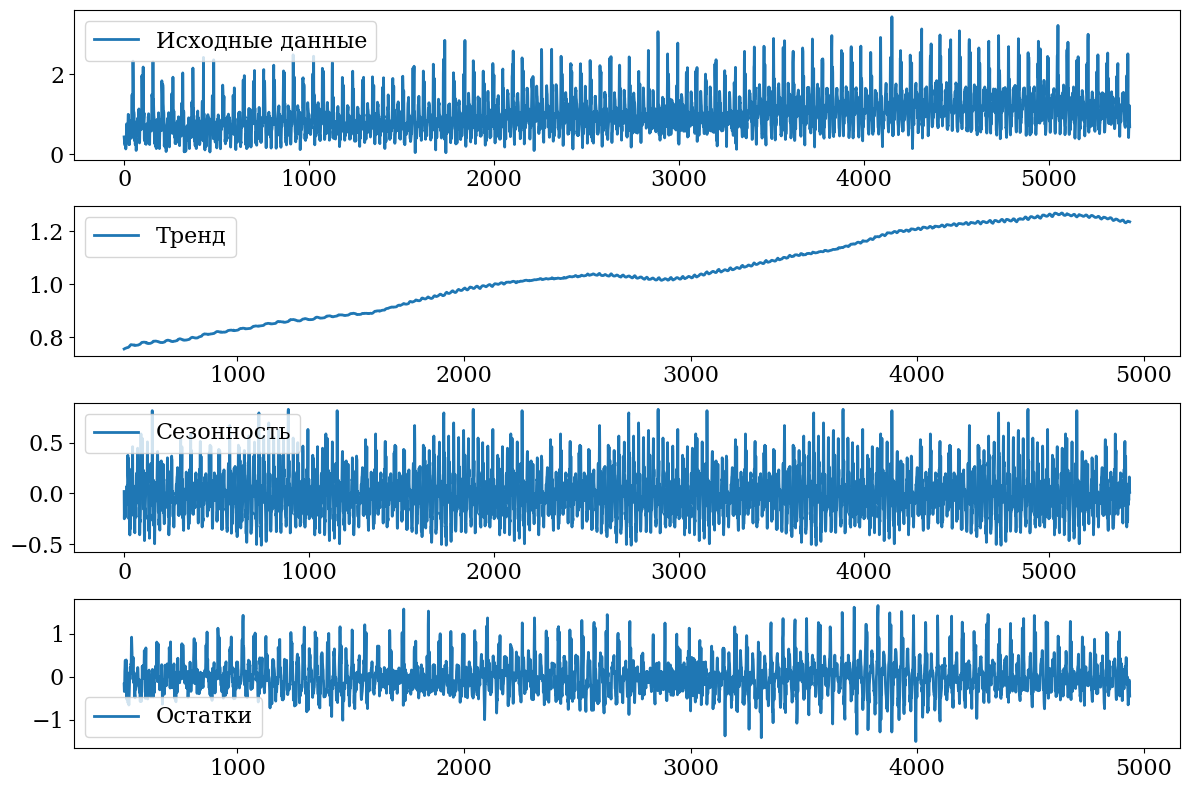

In [ ]:
result = seasonal_decompose(acc_norm, model='additive', period=1000)  # 'additive' или 'multiplicative'
time = np.arange(0,len(acc_norm),1)
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time, acc_norm, label='Исходные данные')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time, result.trend, label='Тренд')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time, result.seasonal, label='Сезонность')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(time, result.resid, label='Остатки')
plt.legend()

plt.tight_layout()
plt.show()

С помощью Фурье

In [ ]:
from scipy.fftpack import fft

In [ ]:
acc_norm.values

array([0.43605492, 0.38244714, 0.32188533, ..., 1.0459861 , 0.76281984,
       0.69034766])

In [ ]:
ts = acc_norm.values
ts = ts - ts.mean()

In [ ]:
num_to_print = 500

Fs = 1

N = len(ts)

__FS = np.linspace(0.0, 1.0/2.0 * Fs, N//2)

__Abs = 2.0/N * np.abs(fft(ts)[0:N//2]) #нормирование

# plotting the spectrum
fig = go.Figure()
fig.add_scatter(
    x = __FS[0:num_to_print],
    y = __Abs[0:num_to_print],
    mode='lines',
    name='Magnitude'
)

temp_fft = fft(ts)[0:N//2]

__Ph = np.arctan2(np.imag(temp_fft),np.real(temp_fft))

fig.add_scatter(
    x = __FS[0:num_to_print],
    y = __Ph[0:num_to_print],
    mode='markers',
    name='Phase'
)

fig.add_trace(
    go.Bar(
        x= __FS[0:num_to_print],
        y= __Ph[0:num_to_print],
        name='Phase'
    )
)

fig['layout']['yaxis1'].update(title='Magnitude')
fig['layout']['xaxis1'].update(title='Frec [1/day]')
fig.show()

In [ ]:
pd_Abs = pd.DataFrame(__Abs).sort_values(0, ascending=False)

In [ ]:
n_fig = 100
fig = go.Figure()

fig.add_scatter(
    x = np.arange(n_fig),
    y = ts[:n_fig],
    mode = 'lines',
    name = 'Real')

t = np.arange(n_fig)

for i, ind in enumerate(pd_Abs.index.values[:4]):
  x = __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])

  fig.add_scatter(
      x = t[:n_fig],
      y = x,
      mode='lines',
      name=f'{i} frec'
  )

for i, ind in enumerate(pd_Abs.index.values[:1000]):
  if i == 0:
    x = __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])
  else:
    x+= __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])

fig.add_scatter(
    x = t[:n_fig],
    y = x,
    mode='lines',
    name='0-1000 frec'
)

fig.show()

## С помощью SSA

In [ ]:
class SSA(object):

    __supported_types = (pd.Series, np.ndarray, list)

    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.

        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list.
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.

        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """

        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")

        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")

        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1

        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T

        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)

        self.TS_comps = np.zeros((self.N, self.d))

        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]

            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]

            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."

            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."

        # Calculate the w-correlation matrix.
        self.calc_wcorr()

    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d

        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)


    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.

        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]

        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)

    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """

        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])

        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)

        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5

        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]

    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d

        if self.Wcorr is None:
            self.calc_wcorr()

        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)

        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max

        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)


In [ ]:
ts_ssa = SSA(acc_norm.values, 10)

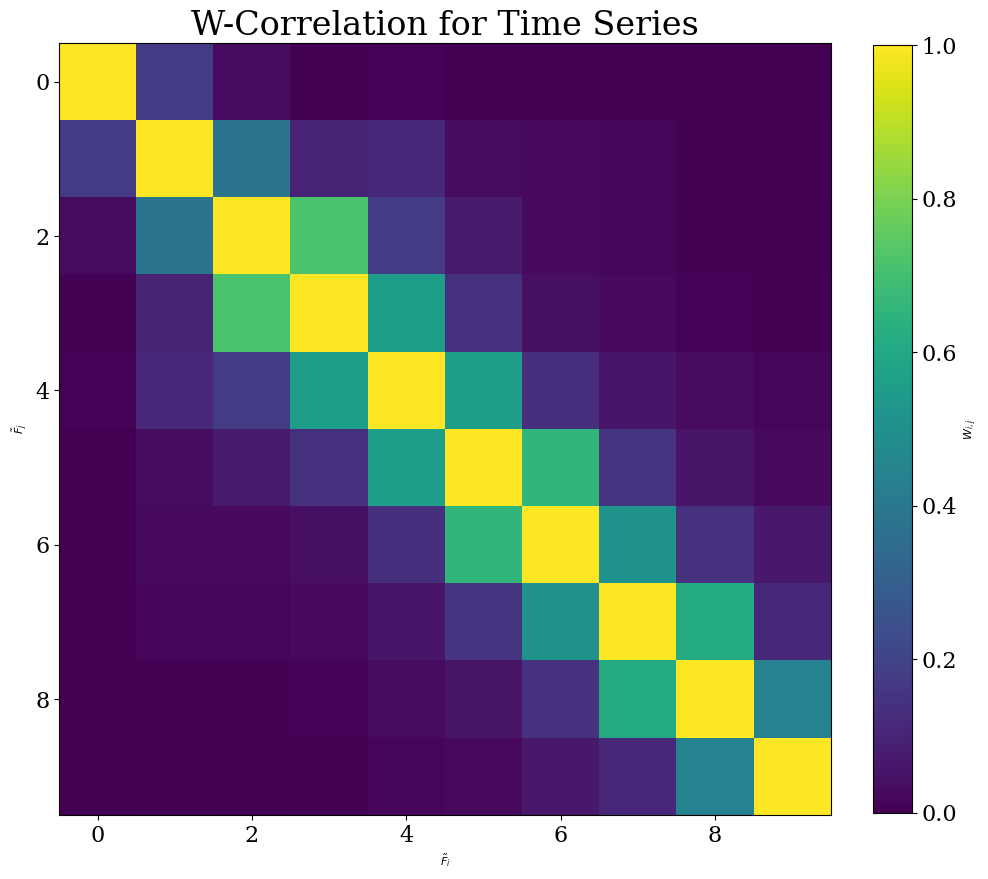

In [ ]:
plt.figure(figsize=(11, 11))
ts_ssa.plot_wcorr(max=10)
plt.title("W-Correlation for Time Series");

In [ ]:
n_fig = 1000
fig = go.Figure()

fig.add_scatter(
    x = np.arange(n_fig),
    y = acc_norm.values[:n_fig],
    mode='lines',
    name='Real')

for i in range(5):
  fig.add_scatter(
      x = np.arange(n_fig),
      y = ts_ssa.reconstruct(i)[:n_fig],
      mode='lines',
      name=f'{i} component SSA'
  )

fig.add_scatter(
      x = np.arange(n_fig),
      y = ts_ssa.reconstruct(slice(0,5))[:n_fig],
      mode='lines',
      name=f'0-5 components SSA'
  )

fig.show()

сравнили ssa and FFT

In [ ]:
n_fig = 100
fig = go.Figure()

fig.add_scatter(
    x = np.arange(n_fig),
    y = acc_norm.values[:n_fig],
    mode='lines',
    name='Real')

fig.add_scatter(
    x = np.arange(n_fig),
    y = ts_ssa.reconstruct(slice(0,5))[:n_fig],
    mode='lines',
    name='SSA'
)


for i, ind in enumerate(pd_Abs.index.values[:1000]):
  if i == 0:
    x = __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])
  else:
    x+= __Abs[ind]*np.cos(2*np.pi*__FS[ind]*t + __Ph[ind])

fig.add_scatter(
    x = t[:n_fig],
    y = x + acc_norm.values.mean(),
    mode='lines',
    name='FFT'
)

fig.show()

## Применение моделей ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
reconstructed_series = ts_ssa.reconstruct(slice(0,5))
original_series = acc_norm.values

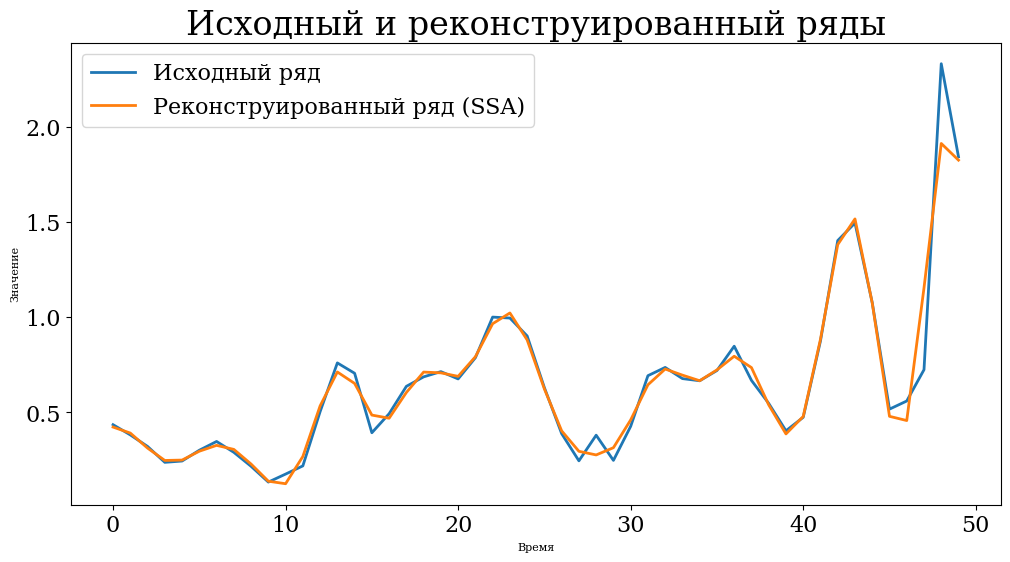

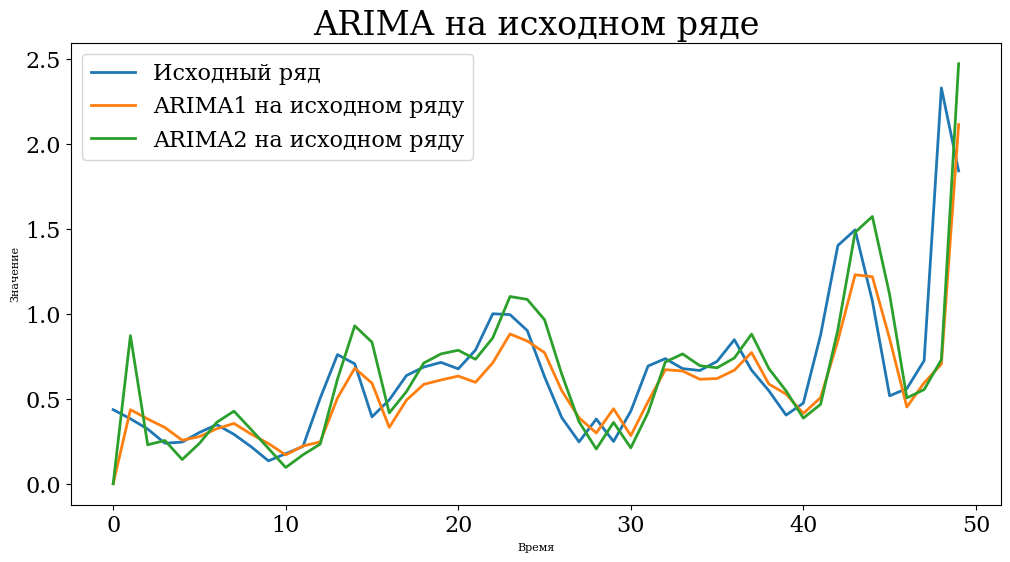

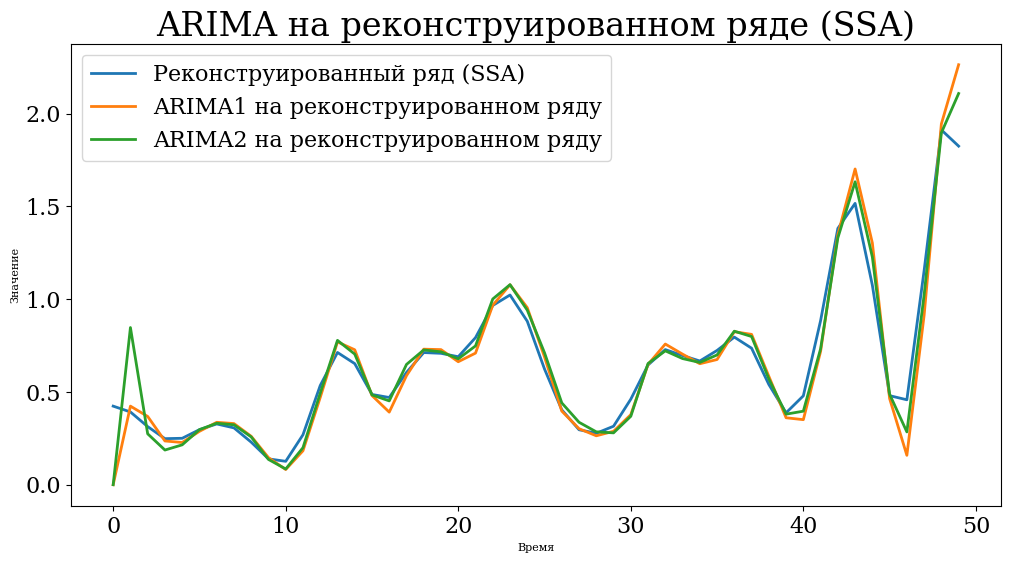

In [ ]:
n = 50

plt.figure(figsize=(12, 6))
plt.plot(time[:n], original_series[:n], label='Исходный ряд')
plt.plot(time[:n], reconstructed_series[:n], label='Реконструированный ряд (SSA)')
plt.title('Исходный и реконструированный ряды')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

arima11 = ARIMA(original_series, order=(1, 1, 2))
arima12 = ARIMA(original_series, order=(2, 3, 4))
arima21  = ARIMA(reconstructed_series, order=(1, 1, 2))
arima22  = ARIMA(reconstructed_series, order=(2, 3, 4))

arima_result_original_1 = arima11.fit()
arima_result_original_2 = arima12.fit()

arima_result_reconstructed_1 = arima21.fit()
arima_result_reconstructed_2 = arima22.fit()


plt.figure(figsize=(12, 6))
plt.plot(time[:n], original_series[:n], label='Исходный ряд')
plt.plot(time[:n], arima_result_original_1.fittedvalues[:n], label='ARIMA1 на исходном ряду')
plt.plot(time[:n], arima_result_original_2.fittedvalues[:n], label='ARIMA2 на исходном ряду')
plt.title('ARIMA на исходном ряде')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(time[:n], reconstructed_series[:n], label='Реконструированный ряд (SSA)')
plt.plot(time[:n], arima_result_reconstructed_1.fittedvalues[:n], label='ARIMA1 на реконструированном ряду')
plt.plot(time[:n], arima_result_reconstructed_2.fittedvalues[:n], label='ARIMA2 на реконструированном ряду')
plt.title('ARIMA на реконструированном ряде (SSA)')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()